In [1]:
# load packages
library(purrr)        |> suppressPackageStartupMessages()
library(Rgraphviz)    |> suppressPackageStartupMessages()
library(bnlearn)      |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()
library(Rgraphviz)    |> suppressPackageStartupMessages()
source('K2methods.r') |> suppressPackageStartupMessages()

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
data = child()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



In [3]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)
cat('The dataset dimensions are:', dim(DF))

colnames(DF) <- child()@variables
head(DF)

The dataset dimensions are: 5000 20

,BirthAsphyxia,Disease,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHReport,LowerBodyO2,RUQO2,CO2Report,XrayReport,GruntingReport
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,3,3,2,1,3,1,1,2,1,1,1,1,2,2,2,3,2,1,2
2,2,4,2,1,1,2,1,2,2,1,2,1,2,2,1,2,2,1,2,2
3,2,3,1,2,1,3,1,2,2,1,2,2,2,2,2,1,2,1,2,2
4,2,4,1,1,1,3,1,1,2,1,3,1,1,2,1,3,1,1,1,2
5,2,2,1,2,2,4,1,1,1,1,3,1,1,2,2,1,1,1,2,2
6,2,2,1,2,1,4,1,3,2,1,3,1,3,2,2,2,1,1,3,2


In [4]:
today = 30062023 # default seed = 12345

In [5]:
struct = K2(n = ncol(DF), u = 3, D = DF, seed = today, num.iterations = 1)

Running iteration # 1 ...The Network score is -59945.13 
   DONE 

Total execution time: 73.09778 mins


In [6]:
# struct = list(NA, 1, c(2, 1), c(3,2), c(3,2), c(3,5,1), 3, c(3,2), c(3,6), c(3,5), 
#     c(3,2), c(8,5), c(3,5), c(3,2), c(3,14), c(3,15), c(14,12,15), c(3,2), c(3,5), c(14,8))
struct

$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] 1

$dag[[3]]
[1] 2

$dag[[4]]
[1] 2

$dag[[5]]
[1] 2

$dag[[6]]
[1] 2

$dag[[7]]
[1] 2

$dag[[8]]
[1] 2

$dag[[9]]
[1] 2 3

$dag[[10]]
[1] 5 6

$dag[[11]]
[1] 6 7

$dag[[12]]
[1] 7

$dag[[13]]
[1] 8 7

$dag[[14]]
[1] 7 9

$dag[[15]]
[1] 4 2

$dag[[16]]
[1] 11 10

$dag[[17]]
[1] 11

$dag[[18]]
[1] 12

$dag[[19]]
[1] 13

$dag[[20]]
[1] 14


$score
[1] -59945.13

$order
 [1] "BirthAsphyxia"  "Disease"        "Age"            "LVH"           
 [5] "DuctFlow"       "CardiacMixing"  "LungParench"    "LungFlow"      
 [9] "Sick"           "HypDistrib"     "HypoxiaInO2"    "CO2"           
[13] "ChestXray"      "Grunting"       "LVHReport"      "LowerBodyO2"   
[17] "RUQO2"          "CO2Report"      "XrayReport"     "GruntingReport"

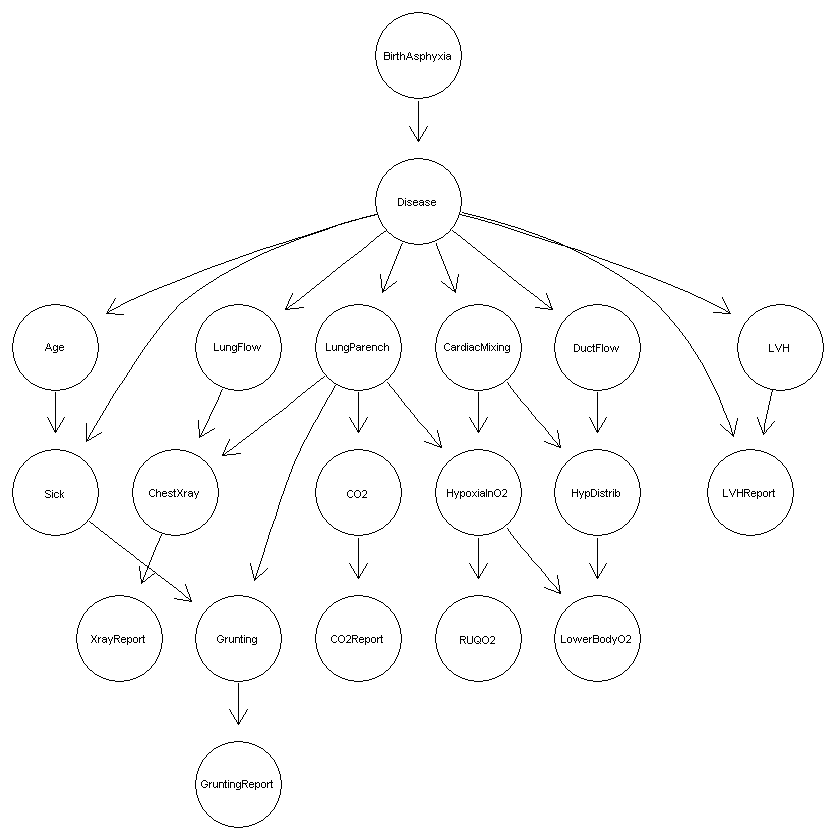

In [7]:
dag = get_dag(names(DF), struct$dag)
graphviz.plot(dag)

## `bnlearn` comparison

In [8]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node Age (multinomial distribution)

Conditional probability table:
 
   Disease
Age          1          2          3          4          5          6
  1 0.90256410 0.75529286 0.35092673 0.80362145 0.83265491 0.87802607
  2 0.07641026 0.16142390 0.20561830 0.13915566 0.11216644 0.09450652
  3 0.02102564 0.08328324 0.44345497 0.05722289 0.05517865 0.02746741

  Parameters of node BirthAsphyxia (multinomial distribution)

Conditional probability table:
          1          2 
0.08622754 0.91377246 

  Parameters of node CardiacMixing (multinomial distribution)

Conditional probability table:
 
             Disease
CardiacMixing           1           2           3           4           5
            1 0.394230769 0.023091565 0.013955256 0.007578031 0.013907734
            2 0.408076923 0.074183530 0.132547785 0.017481993 0.026119403
            3 0.172692308 0.092215989 0.825857950 0.953856543 0.941994573
            4 0.025000000 0.8105089

In [9]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -59945.13

[1] -60015.09

In [10]:
dataset <- child()
net <- BN(dataset)

In [11]:
net


Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2

In [12]:
net <- learn.network(dataset)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



In [13]:
net


Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2
Adjacency matrix:
               BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       1   0   0        0             0           0
Disease                    0       0   1   0        1             1           1
Age                        0       0   0   0        0             0           0
LVH                        0       1   0   0        0             0           0
DuctFlow                   0       0   0   0        0             0           0
CardiacMixing              0       0   0   0        0             0           1
LungParench    

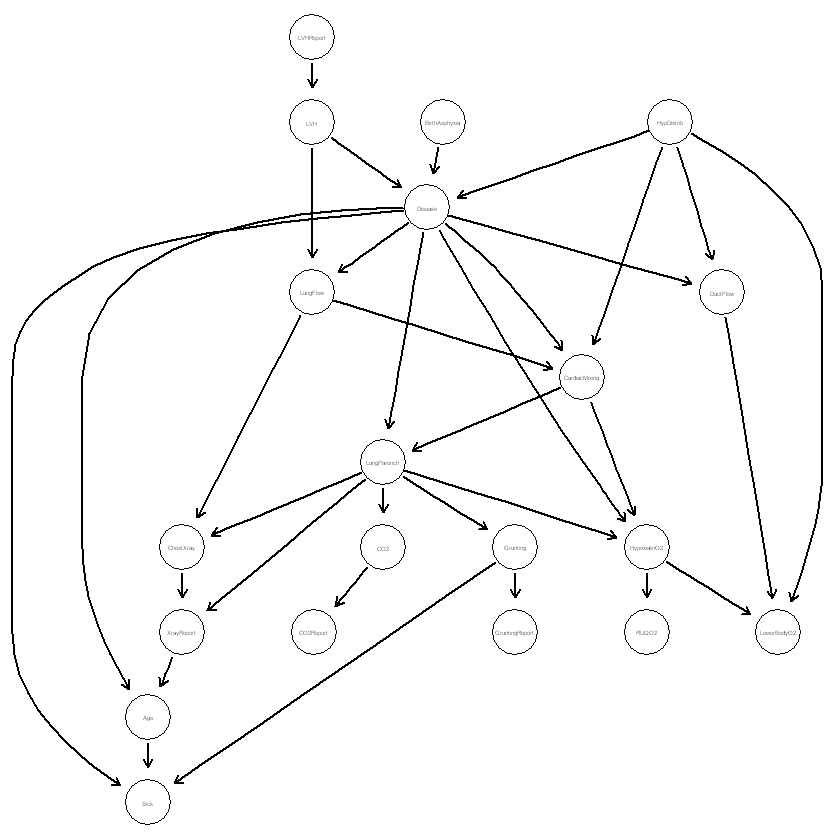

In [14]:
plot(net)